In [114]:
import numpy as np 
from sklearn import metrics
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
RSTATE = 2 

In [115]:
def calculate_distances(vector1, vector2, name_of_distance_metric):
    import math

    if name_of_distance_metric == "euclidean":
        distance = math.sqrt(sum([(v1 - v2) ** 2 for v1, v2 in zip(vector1, vector2)]))
    elif name_of_distance_metric == "manhattan":
        distance = np.sum(np.abs(vector1 - vector2))
    
    return distance

In [116]:
v1 = np.array((1, 2, 3, 4, 5))
v2 = np.array((7, 8, 9, 4, 2))

euclidean = calculate_distances(v1, v2, "euclidean")
manhattan = calculate_distances(v1, v2, "manhattan")

print("Euclidean:", euclidean)
print("Manhattan:", manhattan)

Euclidean: 10.816653826391969
Manhattan: 21


In [117]:
def purity(y_true, y_predicted):
    """
    Input:
        y_true: true labels
        x_pred: predicted labels
    """
    matrix = metrics.cluster.contingency_matrix(y_true, y_predicted)
    purity = np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)
    return purity

In [118]:
y_true = pd.Series([1, 1, 0, 1, 0, 1, 0, 1, 1])
y_pred = pd.Series([1, 0, 0, 1, 0, 1, 0, 1, 1])
purity(y_true, y_pred)

0.8888888888888888

In [119]:
def evaluation_metrics(X, true_labels, predicted_labels, metric, algorithm, rstate = RSTATE):
    """
    predicted label = 

X 
train_set test_set 

true_label = y_test_set (original test test that has been tested on)
predicted_label = y_predicted_labels (labels that has been predicted with the model)

    """
    sil_score = metrics.silhouette_score(X, predicted_labels, metric, random_state=RSTATE)

    pure_score = purity(true_labels, predicted_labels)

    ss = ("S_S", sil_score, metric)
    ps = ("Purity", pure_score, metric)

    values = ss, ps

    dataframe_with_metrics = pd.DataFrame(data = values, columns = ['Metric', 'Value', 'Algorithm'])
    return dataframe_with_metrics


# Plot

In [120]:
def plot_clusters(data, true_labels, predicted_labels, algorithm, rstate=RSTATE, reference_plot=True):
    pca = PCA(n_components=2, random_state=RSTATE)
    pca = pca.fit_transform(data)

    if reference_plot == True:
        plt.scatter(pca[:,0], pca[:,1], c=true_labels)
        plt.title("Reference plot")
        plt.show()
    elif reference_plot == False:
        plt.scatter(pca[:,0], pca[:,1], c=predicted_labels)
        plt.title(algorithm)
        plt.show()

# Elbow method

In [97]:
def elbow_method(X, max_range_for_elbow, rstate=RSTATE):
    K = range(1, max_range_for_elbow + 1)
    inertia = []
    for k in K:
        kmeans = KMeans(n_clusters = k, random_state = rstate)
        kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K, inertia)
    plt.title("The elbow method showing the optimal k")
    plt.show()

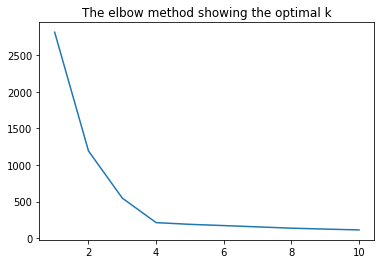

In [98]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
elbow_method(X,10)

# Data (Clustering)

In [99]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]

data = pd.DataFrame(data=X, columns=feature_names)

In [100]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [101]:
def data_preprocessing(data):
    scaler = StandardScaler()
    std_data = scaler.fit_transform(data)
    std_data = pd.DataFrame(std_data, columns=feature_names)

    return std_data

In [102]:
data_standardized = data_preprocessing(data)

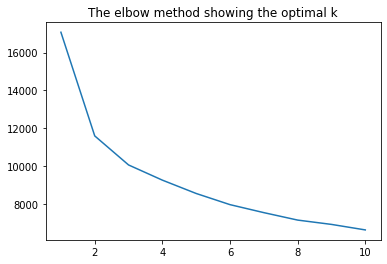

In [103]:
elbow_method(data_standardized, max_range_for_elbow=10)

In [104]:
optimal_number_of_clusters_6b = 2

## K-means

In [105]:
kmeans = KMeans(n_clusters=optimal_number_of_clusters_6b, init="k-means++", random_state=RSTATE)
y_pred = kmeans.fit_predict(data_standardized)

In [106]:
evaluation_metrics_Kmeans = evaluation_metrics(X=data_standardized, true_labels=y, predicted_labels=y_pred, metric="euclidean", algorithm="KMeans++", rstate = RSTATE)

In [107]:
evaluation_metrics_Kmeans

,Metric,Value,Algorithm
0,S_S,0.343382,euclidean
1,Purity,0.905097,euclidean


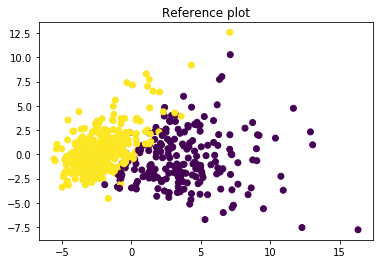

In [122]:
plot_clusters(data_standardized,y,y_pred,"Kmeans", reference_plot=True) #asm83f